<a href="https://colab.research.google.com/github/RahmanMonty/Unemployment/blob/master/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns ; sns.set()

In [0]:
# As the CoronaVirus keeps many of us in quarantine and isolation, a lot of jobs that are considered non-essential restricts us
# from going to work and getting paid. As this problem continues, the nation is experiencing higher then usual unemployment claims. This project
# will explore the populations of states that have applied for unemployment benefits, the unique pay that each state offers, and how they compare
# to one another.

In [0]:
df = pd.read_csv("State Unemployment Data.csv")
df2 = pd.read_csv("Unemployment Max Pay.csv",encoding='latin1')

In [0]:
df.head()

,State,unemploymentRateRank,unemploymentRate,Pop
0,South Carolina,1,0.023,5210095
1,Utah,1,0.023,3282115
2,Vermont,1,0.023,628061
3,North Dakota,4,0.024,761723
4,Colorado,5,0.025,5845526


In [0]:
df2[["State","Max.Weekly Benefits","Max. DA Allowance"]].head()

,State,Max.Weekly Benefits,Max. DA Allowance
0,Alaska,$370,$72
1,Alabama,$265,NaN
2,Arkansas,$451,NaN
3,Arizona,$240,NaN
4,California,$450,NaN


In [0]:
#Because some of the Max. DA Allowance does not have values present we will use the fillna method to fill them with zeros
df2.fillna(0)

,State,Unemp Rate,Max Weeks of Benefits,Max.Weekly Benefits,Max. DA Allowance,Total Weekly Benefits
0,Alaska,7.1,26,$370,$72,$442
1,Alabama,4.1,26,$265,0,$265
2,Arkansas,3.8,20,$451,0,$451
3,Arizona,4.7,26,$240,0,$240
4,California,4.2,26,$450,0,$450
5,Colorado,2.7,26,$597,0,$597
6,Connecticut,4.4,26,$631,$75,$706
7,Dist of Columbia,5.6,26,$425,0,$425
8,Delaware,3.9,26,$330,0,$330
9,Florida,3.8,12,$275,0,$275


In [0]:
# Here we want to determine the actual number of unemployed individual of the states population 
# and add it to our data frame that wasn't originally in the CSV file.
df["Unemployed"] = df["Pop"] * df["unemploymentRate"]
df.head()

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed
0,South Carolina,1,0.023,5210095,119832.185
1,Utah,1,0.023,3282115,75488.645
2,Vermont,1,0.023,628061,14445.403
3,North Dakota,4,0.024,761723,18281.352
4,Colorado,5,0.025,5845526,146138.150


In [0]:
df.tail()

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed
45,Louisiana,47,0.049,4645184,227614.016
46,West Virginia,48,0.050,1778070,88903.500
47,District of Columbia,49,0.053,720687,38196.411
48,Mississippi,50,0.057,2989260,170387.820
49,Alaska,51,0.061,734002,44774.122


In [0]:
# Now we will combine the two data frames to get an easier look at the data

join = pd.concat([df,df2[["Max.Weekly Benefits"]]], axis = 1)
join.head(50)

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed,Max.Weekly Benefits
0,South Carolina,1.0,0.023,5210095.0,119832.185,$370
1,Utah,1.0,0.023,3282115.0,75488.645,$265
2,Vermont,1.0,0.023,628061.0,14445.403,$451
3,North Dakota,4.0,0.024,761723.0,18281.352,$240
4,Colorado,5.0,0.025,5845526.0,146138.150,$450
5,Hawaii,6.0,0.026,1412687.0,36729.862,$597
6,New Hampshire,6.0,0.026,1371246.0,35652.396,$631
7,Virginia,6.0,0.026,8626207.0,224281.382,$425
8,Alabama,9.0,0.026,4908621.0,127624.146,$330
9,Iowa,9.0,0.026,3179849.0,82676.074,$275


In [0]:
# In order to find the states that spend the most money on its citizens we must remove the $ sign from the Weekly Benefits Column
# So that we can do some manipulation of the data frames
join['Max.Weekly Benefits'] = join['Max.Weekly Benefits'].str.replace(',', '').str.replace('$', '').astype(int)

In [0]:
#Now with the data frames combined we can see which state pays the largest amount of unemployment to its citizens!
join["Most Money"] = join["Unemployed"] * join["Max.Weekly Benefits"]
join[["State", "Unemployed", "Max.Weekly Benefits", "Most Money"]]

,State,Unemployed,Max.Weekly Benefits,Most Money
0,South Carolina,119832.185,370,4.433791e+07
1,Utah,75488.645,265,2.000449e+07
2,Vermont,14445.403,451,6.514877e+06
3,North Dakota,18281.352,240,4.387524e+06
4,Colorado,146138.150,450,6.576217e+07
5,Hawaii,36729.862,597,2.192773e+07
6,New Hampshire,35652.396,631,2.249666e+07
7,Virginia,224281.382,425,9.531959e+07
8,Alabama,127624.146,330,4.211597e+07
9,Iowa,82676.074,275,2.273592e+07


In [0]:
# From this data we can see that California, Texas, and New York pay out the most unemployment to their citizens
# Taking into consideration the states population and the benefits they offer.
LuckyPeople = join.nlargest(5, "Most Money")
LuckyPeople[["State", "Unemployed", "Max.Weekly Benefits", "Most Money"]]

,State,Unemployed,Max.Weekly Benefits,Most Money
35,California,1557562.071,598,9.314221e+08
26,Texas,1031530.325,487,5.023553e+08
38,New York,777618.760,561,4.362441e+08
39,Ohio,493403.148,566,2.792662e+08
31,North Carolina,392638.894,696,2.732767e+08


In [0]:
LuckyPeople1 = LuckyPeople.nsmallest(10, "Most Money")

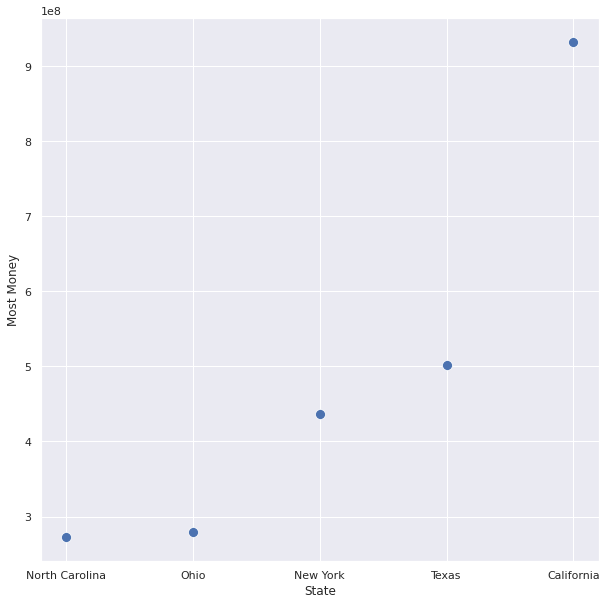

In [0]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "State", y = "Most Money", data = LuckyPeople1, s =100 )

ax

In [0]:
join.describe()

,unemploymentRateRank,unemploymentRate,Pop,Unemployed,Max.Weekly Benefits,Most Money
count,50.000000,50.000000,5.000000e+01,5.000000e+01,51.000000,5.000000e+01
mean,25.400000,0.035620,6.605257e+06,2.378214e+05,464.058824,1.134125e+08
std,15.141509,0.008808,7.485259e+06,2.825675e+05,138.078588,1.574929e+08
min,1.000000,0.023000,5.670250e+05,1.444540e+04,235.000000,4.387524e+06
25%,12.500000,0.029250,1.857760e+06,6.426941e+04,362.500000,2.979780e+07
50%,26.000000,0.034500,4.572438e+06,1.526392e+05,442.000000,6.246373e+07
75%,37.000000,0.039000,7.692445e+06,2.914901e+05,563.500000,1.307729e+08
max,51.000000,0.061000,3.993749e+07,1.557562e+06,795.000000,9.314221e+08


In [0]:
#Due to the unavailabillity of state by state unemployment demographics I will be utilizing national 
#data to reflect each states unemployment demographic payout.

df3 = pd.read_csv("EPI Data Library - Unemployment.csv")


In [0]:
#Since Febuary is the most recent month, these percentages will be used to determine and represent the nations respective states
df3.head()

,Date,All,Black,Hispanic,White
0,Feb-20,3.60%,6.00%,4.30%,3.00%
1,Jan-20,3.60%,6.00%,4.30%,3.00%
2,Dec-19,3.70%,6.10%,4.30%,3.00%
3,Nov-19,3.70%,6.10%,4.30%,3.10%
4,Oct-19,3.70%,6.20%,4.30%,3.10%


In [0]:
unemployed = join[["State", "Unemployed"]]
unemployed.head()

,State,Unemployed
0,South Carolina,119832.185
1,Utah,75488.645
2,Vermont,14445.403
3,North Dakota,18281.352
4,Colorado,146138.150


In [0]:
df4= pd.read_csv("State Demographics.csv", encoding='latin1')
df4.head()
# df4["State", "Hispanic (of any race)", "Non-Hispanic White", "Non-Hispanic Black"]

,State,Total population,Hispanic (of any race),Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Non-Hispanic American Indian
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"4,874,747","201,970","3,191,450","1,302,295","65,494","22,209"
2,Alaska,"739,795","51,712","448,081","21,192","48,569","105,146"
3,Arizona,"7,016,270","2,202,173","3,836,639","290,379","225,810","274,496"
4,Arkansas,"3,004,279","223,764","2,173,307","455,500","46,583","16,901"


In [0]:
df5 = df4[["State", "Hispanic (of any race)", "Non-Hispanic White", "Non-Hispanic Black"]]
df5.head()

,State,Hispanic (of any race),Non-Hispanic White,Non-Hispanic Black
0,NaN,NaN,NaN,NaN
1,Alabama,"201,970","3,191,450","1,302,295"
2,Alaska,"51,712","448,081","21,192"
3,Arizona,"2,202,173","3,836,639","290,379"
4,Arkansas,"223,764","2,173,307","455,500"


In [0]:
#Utilizing the national unemployment numbers published by the economic policy institute for February 2020 I was able to 
# determine the number of unemployed members of each state for the demographics of black, hispanics, and white.


unemployed["African American UE"] = unemployed["Unemployed"] * .06
unemployed["Hispanic UE"] = unemployed["Unemployed"] * .043
unemployed["White UE"] = unemployed["Unemployed"] * .03
unemployed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,State,Unemployed,African American UE,Hispanic UE,White UE
0,South Carolina,119832.185,7189.93110,5152.783955,3594.96555
1,Utah,75488.645,4529.31870,3246.011735,2264.65935
2,Vermont,14445.403,866.72418,621.152329,433.36209
3,North Dakota,18281.352,1096.88112,786.098136,548.44056
4,Colorado,146138.150,8768.28900,6283.940450,4384.14450
5,Hawaii,36729.862,2203.79172,1579.384066,1101.89586
6,New Hampshire,35652.396,2139.14376,1533.053028,1069.57188
7,Virginia,224281.382,13456.88292,9644.099426,6728.44146
8,Alabama,127624.146,7657.44876,5487.838278,3828.72438
9,Iowa,82676.074,4960.56444,3555.071182,2480.28222


In [0]:
# From the above data, based on the nations demographic unemployment percentages, an approximation of each states
# African American, Hispanic, and White unemployment recipients can be made.